# Traitement des données

---

Jérémie GANTET INSA-4IR 😏 <br>
21 juillet 2020

---

## Importation des librairies utiles

In [15]:
import datetime
from datetime import date
import pandas as pd
import seaborn as sns
import scipy.stats as stat
from scipy.stats import norm
from scipy.stats import weibull_min
from scipy.stats import triang
from scipy.stats import alpha
from scipy.stats import tvar
from scipy.stats import tstd
from sklearn import dummy
from sklearn import neighbors
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sty import fg, bg, ef, rs
%pylab inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jérémie\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colorbar', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Récupération des données

In [16]:
data = pd.read_csv('E:/eDocuments/obsolescence_prediction/data.csv', sep=';')
data.head()

marque             modèle date début commercialisation  \
0  Apple     iPhone SE 2020                   01/04/2020   
1  Apple          iPhone 11                   01/09/2019   
2  Apple      iPhone 11 Pro                   01/09/2019   
3  Apple  iPhone 11 Pro Max                   01/09/2019   
4  Apple          iPhone Xr                   01/09/2018   

  date fin commercialisation (déduite) différence   prédécesseur successeur  \
0                                  NaN   #NOMBRE!      iPhone SE        NaN   
1                                  NaN   #NOMBRE!      iPhone Xr        NaN   
2                                  NaN   #NOMBRE!      iPhone Xs        NaN   
3                                  NaN   #NOMBRE!  iPhone Xs Max        NaN   
4                           01/09/2019         12       iPhone X  iPhone 11   

  prix au lancement (€) largeur (mm) hauteur (mm)  ... jeux? (avis)  \
0                   489         67,3        138,4  ...          7,2   
1                   809         75,7        150,9  ...          9,6   
2                  1159         71,4          144  ...          9,6   
3                  1259         77,8          158  ...          9,6   
4                   859         75,7        150,9  ...          9,7   

   photos diurnes (avis)  photos nocturnes (avis) selfies? (avis)  \
0                    8,8                      4,6               7   
1                    9,8                      9,5             9,8   
2                    9,6                      8,1             9,3   
3                    8,9                        8             8,6   
4                    9,5                      8,2             9,1   

   flash? (avis)  appels? (avis)  GPS? (avis) Wifi? (avis)  \
0            8,6               9          9,2          8,2   
1            9,1             9,6          9,5          9,5   
2            9,3             9,6          9,5          9,6   
3              9             9,2          9,2            9   
4            9,2             9,4          9,5          9,5   

  obso ventes totales  obso trends  
0         120,0000863  576,1018607  
1         648,1420046  550,3278437  
2         648,1420046  547,7690953  
3         648,1420046  1949,412941  
4         672,7232606  1125,230711  

[5 rows x 85 columns]

## Formattage des données

In [17]:
tronq_data = data.drop(columns=['date fin commercialisation (déduite)', 'différence', 'prédécesseur',
       'successeur', 'type écran', 'certificat de résistance','nombre avis'])
tronq_data = tronq_data.drop(columns=['dxomark','Ouverture capteur selfie (ƒ/)','Ouverture capteur principal (ƒ/)', 'endurance générale ','endurance pour vidéos', 'endurance pour appeler', 'endurance pour surfer']) #265,160,45
#,'résistant aux rayures', 'gorilla glass', 'certificat de résistance','extensible','fingerprint', 'proximité',
#       'accéléromètre', "lumière d'ambiance", 'Boussole', 'gyroscope','baromètre', 'NFC', 'jack', 'radio FM', 'computer sync', 'tethering',
#       'VoLTE', 'OTA', 'bluetooth', '2G (FR)', '3G (FR)', '4G (FR)', '5G (FR)','2G (US)', '3G (US)', '4G (US)', '5G (US)', '2G (JP)', '3G (JP)',
#       '4G (JP)', '5G (JP)', '2G (CN)', '3G (CN)', '4G (CN)', '5G (CN)','nombre avis', 'général (avis)', 'rayures? (avis)', 'joli? (avis)',
#       'pratique? (avis) ', 'soleil? (avis)', 'son? (avis)', 'fluide? (avis)','jeux? (avis)', 'photos diurnes (avis)', 'photos nocturnes (avis)',
#       'selfies? (avis)', 'flash? (avis)', 'appels? (avis)', 'GPS? (avis)','Wifi? (avis)'])

In [18]:
data_float = tronq_data.copy()
for k in data_float.keys():
    if k not in ['marque', 'modèle']:
        if k not in ['résistant aux rayures', 'gorilla glass','extensible','fingerprint', 'proximité',
       'accéléromètre', "lumière d'ambiance", 'Boussole', 'gyroscope','baromètre', 'NFC', 'jack', 'radio FM', 
       'computer sync', 'tethering', 'VoLTE', 'OTA','date début commercialisation']:
            data_float[k] = [float(val.replace(",",".")) if isinstance(val, str) else val for val in data_float[k]]
        else:
            for i in range(len(data_float[k])):
                if k == "date début commercialisation":
                    if data_float[k][i] == data_float[k][i]:
                        liste_date = data_float[k][i].split('/')
                        if len(liste_date)==3:
                            data_float[k][i] = datetime.date(int(liste_date[2]),int(liste_date[1]),int(liste_date[0]))
                        else:
                            data_float[k][i] = None
                else:                        
                    if data_float[k][i] != data_float[k][i]: 
                        data_float[k][i] = 0
                    elif data_float[k][i].find("N/A")+data_float[k][i].find("Non")+1>=0:
                        data_float[k][i] = 0
                    elif data_float[k][i].find("Oui")+data_float[k][i].find("NFC market dependent")+1>=0:
                        data_float[k][i] = 1
data_float.head()


C:\Users\Jérémie\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jérémie\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Jérémie\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jérémie\Anaconda3\lib\site-packages\ipykernel_launcher

marque             modèle date début commercialisation  \
0  Apple     iPhone SE 2020                   2020-04-01   
1  Apple          iPhone 11                   2019-09-01   
2  Apple      iPhone 11 Pro                   2019-09-01   
3  Apple  iPhone 11 Pro Max                   2019-09-01   
4  Apple          iPhone Xr                   2018-09-01   

   prix au lancement (€)  largeur (mm)  hauteur (mm)  epaisseur (mm)  \
0                  489.0          67.3         138.4             7.3   
1                  809.0          75.7         150.9             8.3   
2                 1159.0          71.4         144.0             8.1   
3                 1259.0          77.8         158.0             8.1   
4                  859.0          75.7         150.9             8.3   

   masse (g)  surface utile (%)  densité (ppi)  ...  jeux? (avis)  \
0      148.0                 65            326  ...           7.2   
1      194.0                 80            324  ...           9.6   
2      188.0                 80            463  ...           9.6   
3      226.0                 84            456  ...           9.6   
4      194.0                 80            324  ...           9.7   

   photos diurnes (avis) photos nocturnes (avis) selfies? (avis)  \
0                    8.8                     4.6             7.0   
1                    9.8                     9.5             9.8   
2                    9.6                     8.1             9.3   
3                    8.9                     8.0             8.6   
4                    9.5                     8.2             9.1   

   flash? (avis)  appels? (avis)  GPS? (avis)  Wifi? (avis)  \
0            8.6             9.0          9.2           8.2   
1            9.1             9.6          9.5           9.5   
2            9.3             9.6          9.5           9.6   
3            9.0             9.2          9.2           9.0   
4            9.2             9.4          9.5           9.5   

   obso ventes totales  obso trends  
0           120.000086   576.101861  
1           648.142005   550.327844  
2           648.142005   547.769095  
3           648.142005  1949.412941  
4           672.723261  1125.230711  

[5 rows x 71 columns]

## Vue d'ensemble 
(chaque colonne de X en fonction de y)

prix au lancement (€)


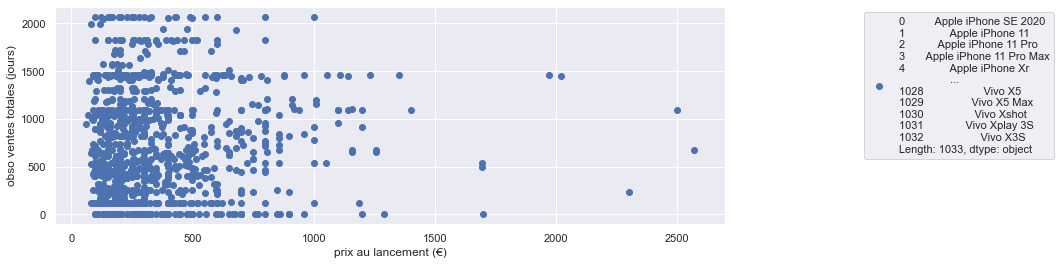

largeur (mm)


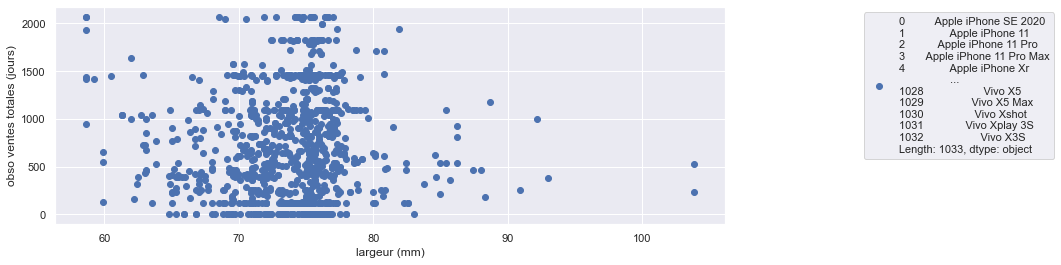

hauteur (mm)


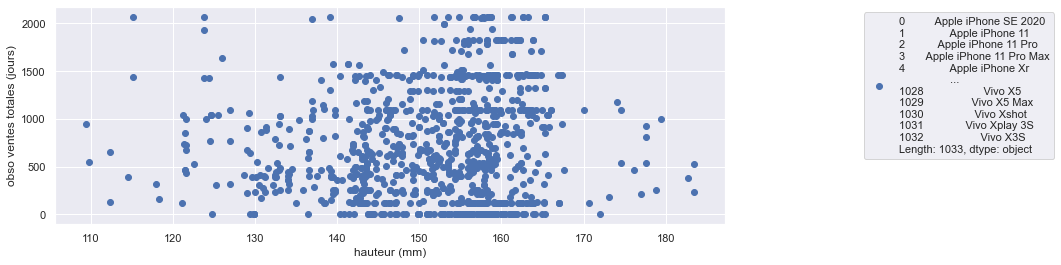

epaisseur (mm)


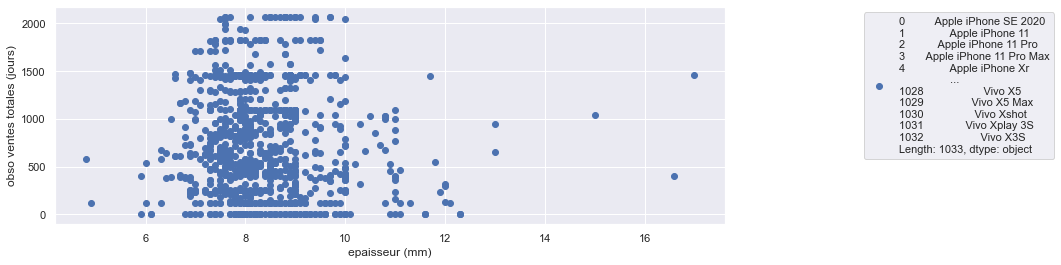

masse (g)


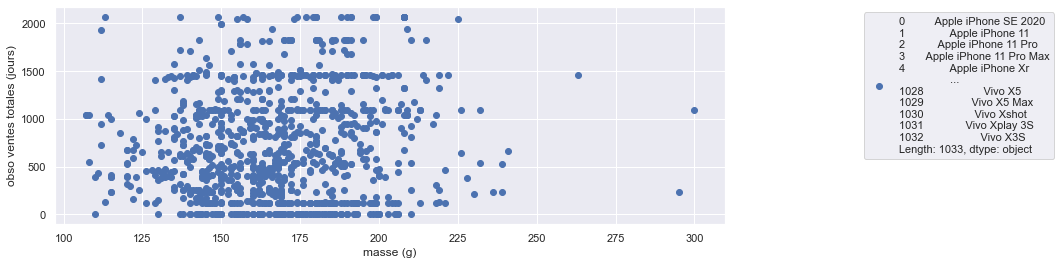

surface utile (%)


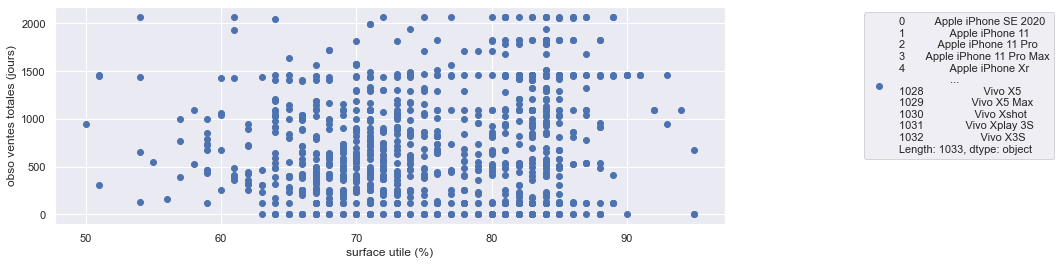

densité (ppi)


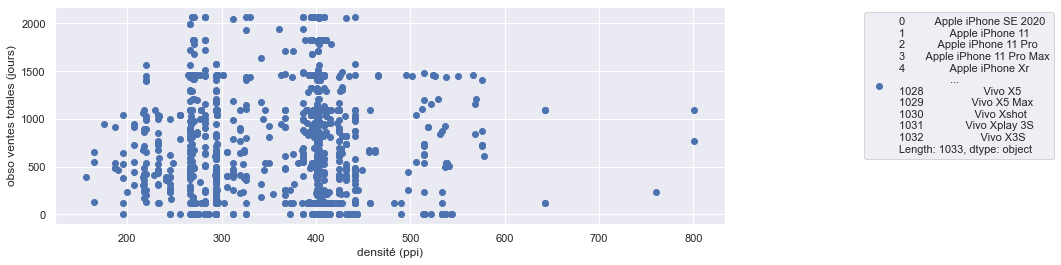

largeur (px)


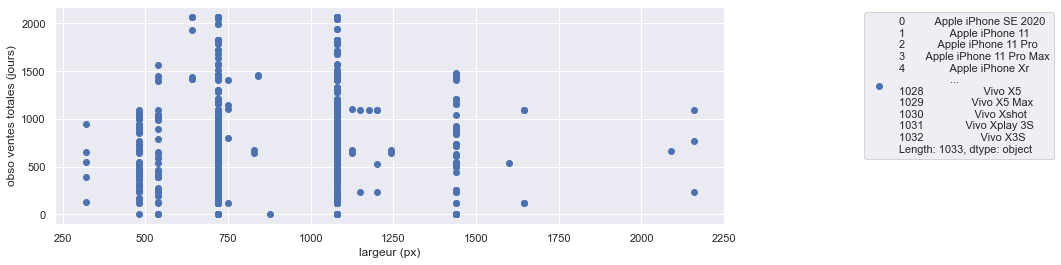

hauteur (px)


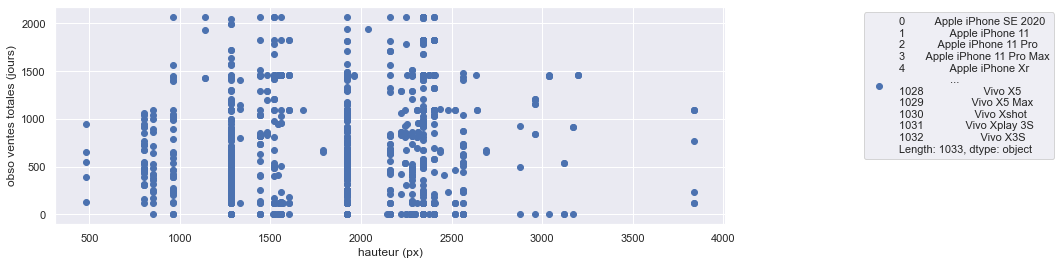

résistant aux rayures


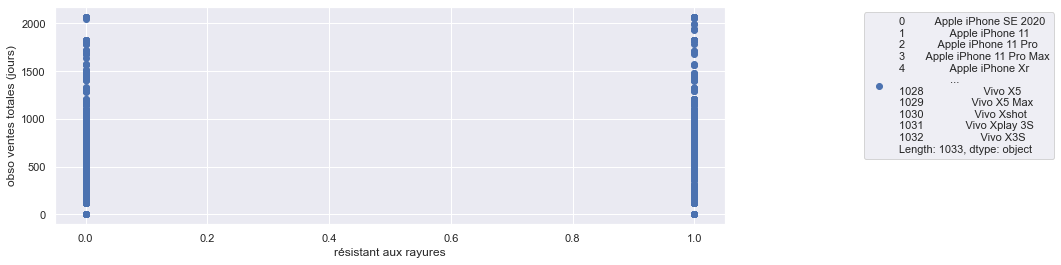

gorilla glass


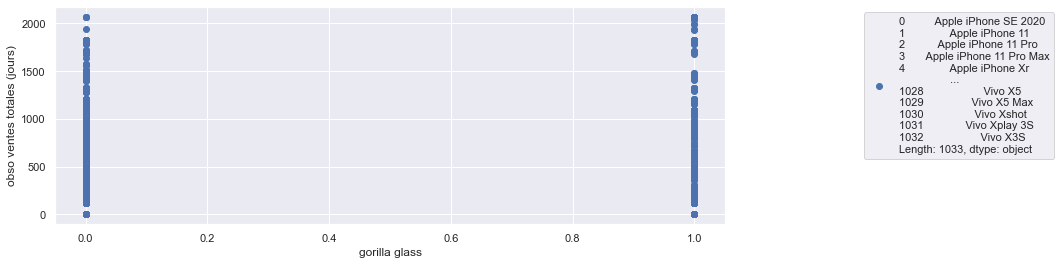

nombre de processeur


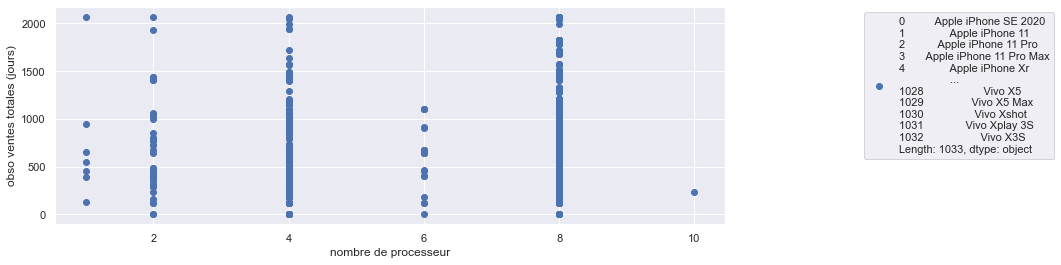

antutu


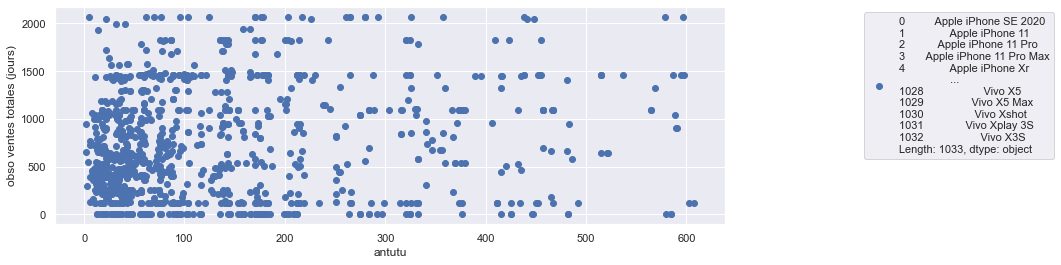

fréquence (GHz)


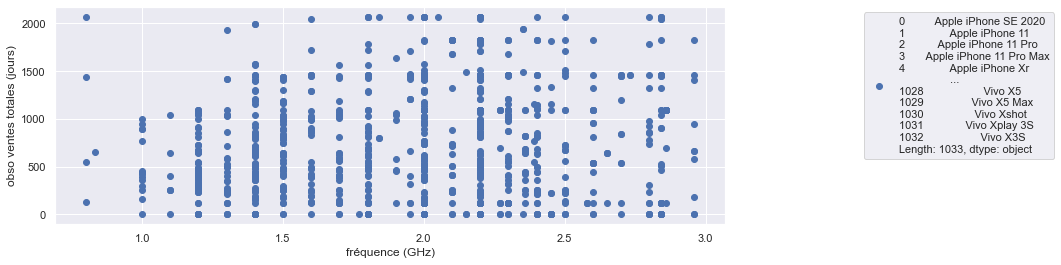

RAM (GB)


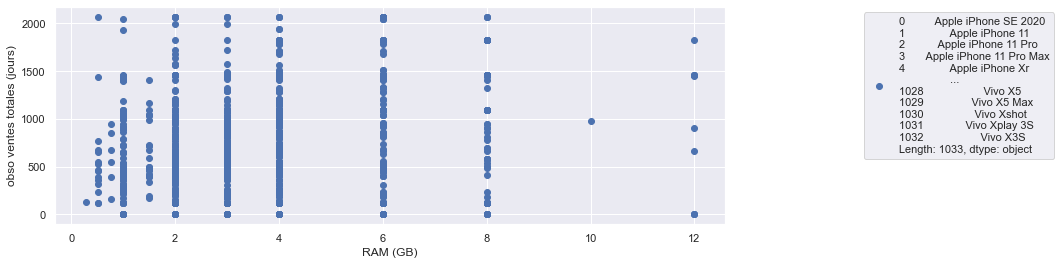

capacité (GB)


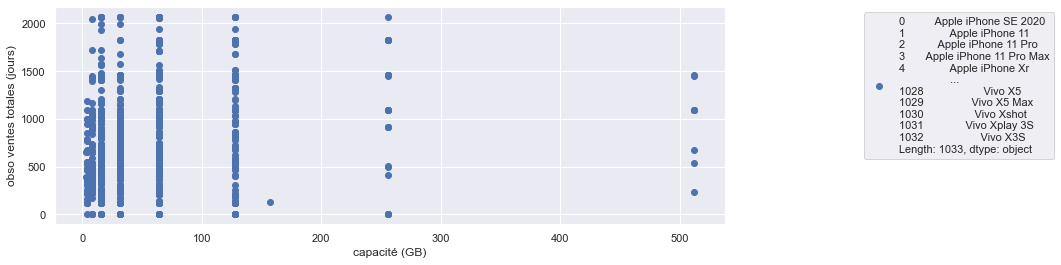

extensible


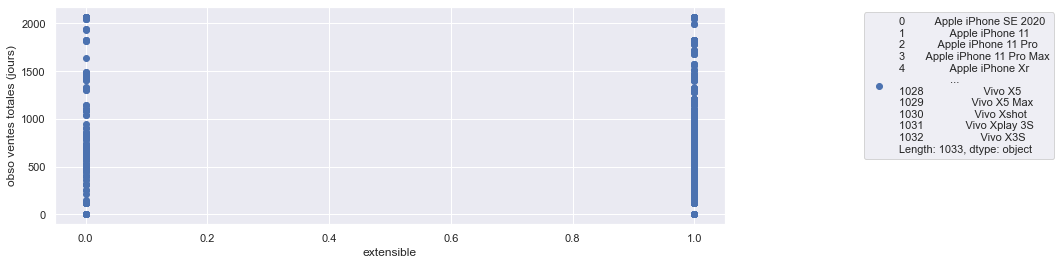

capacité (mAh)


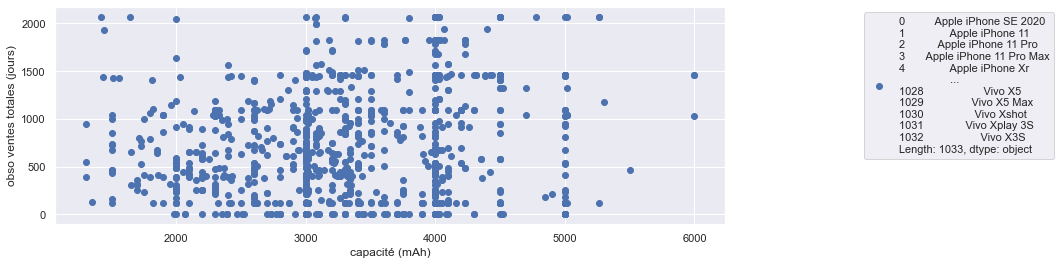

Résolution capteur principal (Mpx)


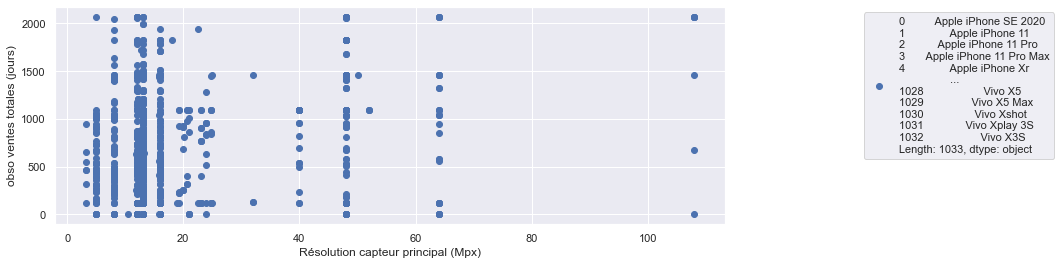

Résolution capteur selfie (Mpx)


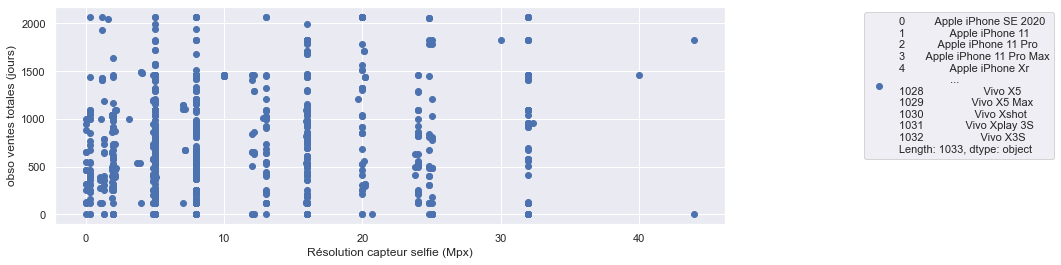

fingerprint


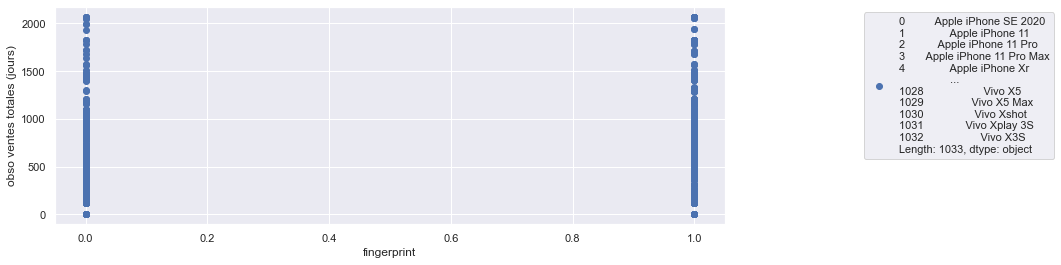

proximité


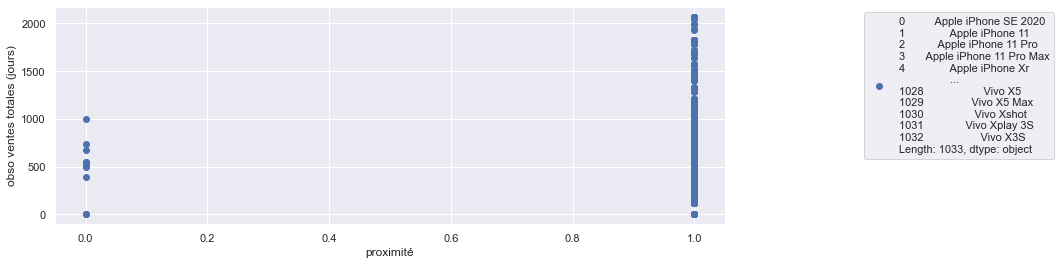

accéléromètre


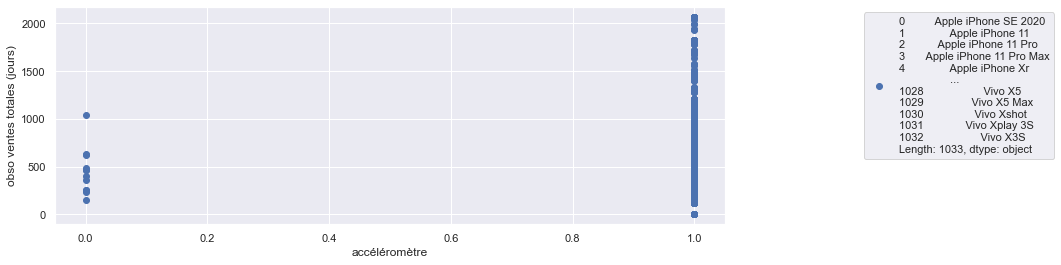

lumière d'ambiance


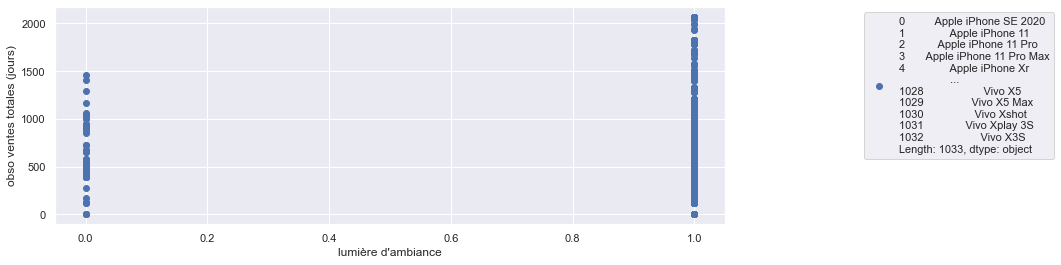

Boussole


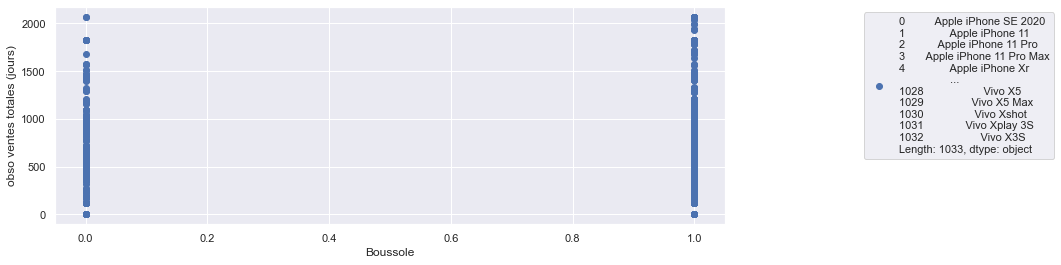

gyroscope


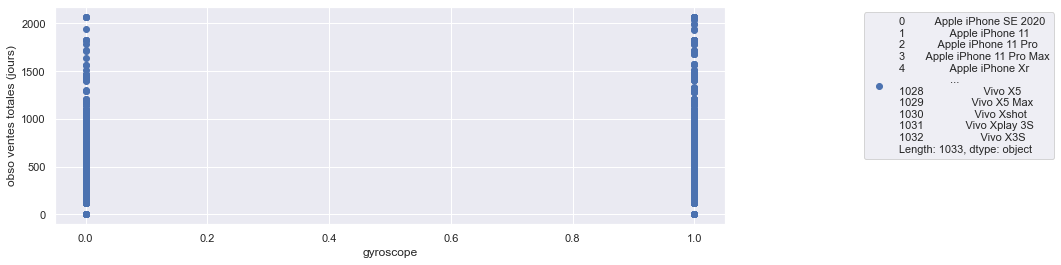

baromètre


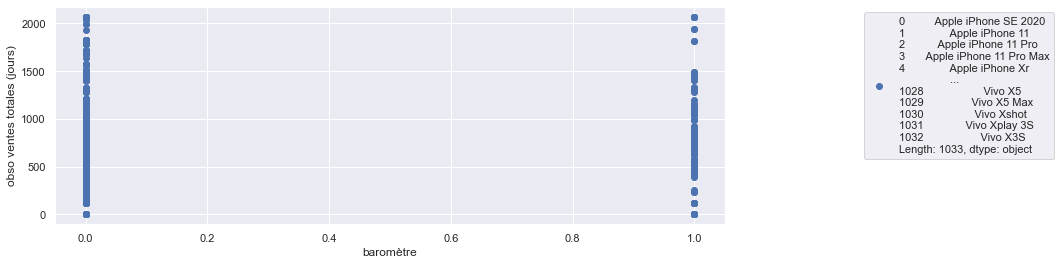

NFC


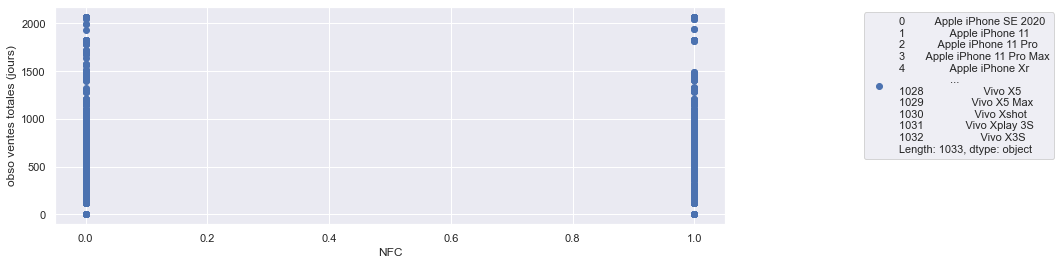

jack


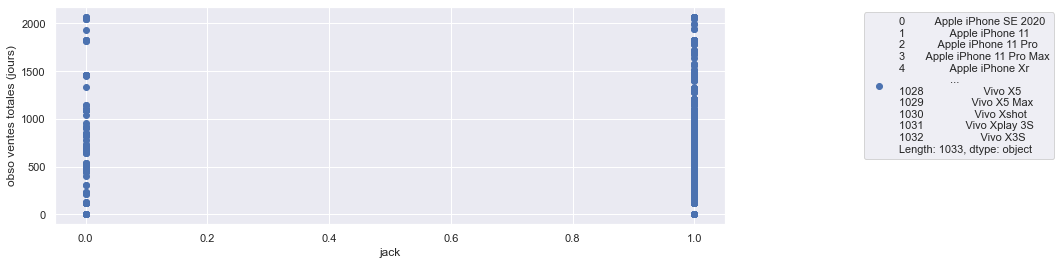

radio FM


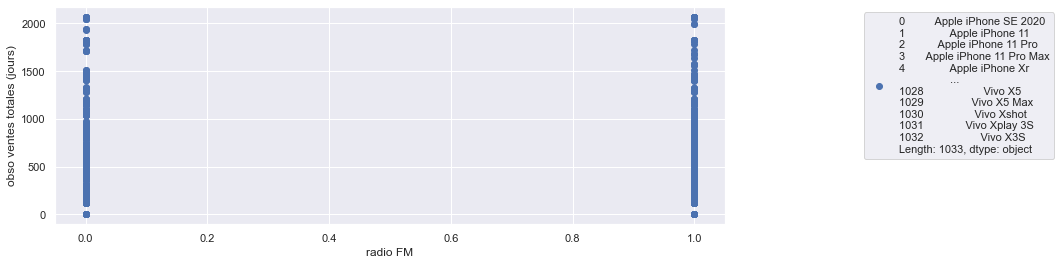

computer sync


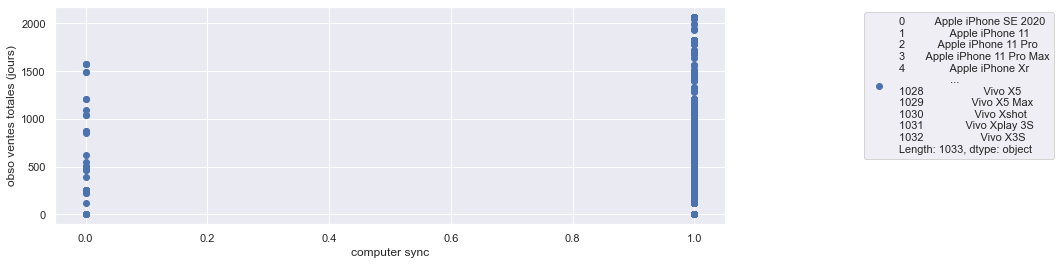

tethering


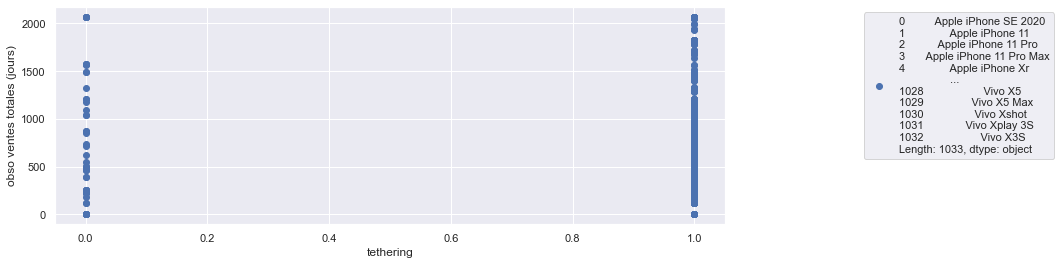

VoLTE


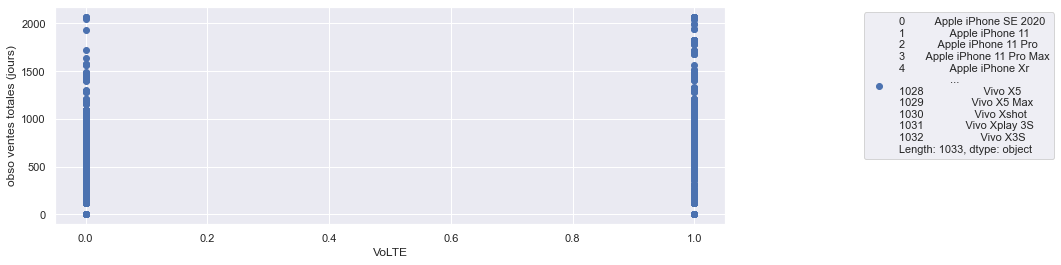

OTA


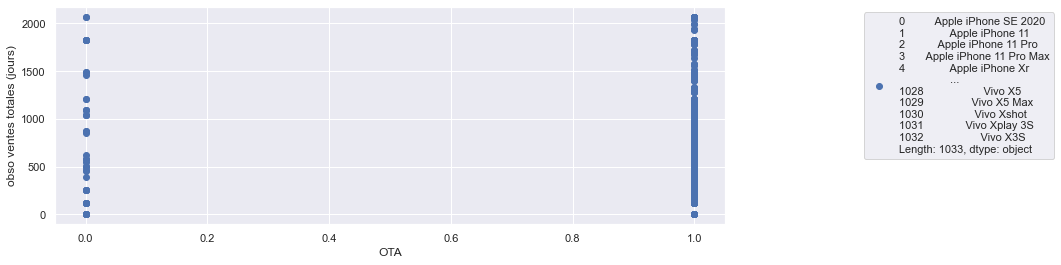

bluetooth


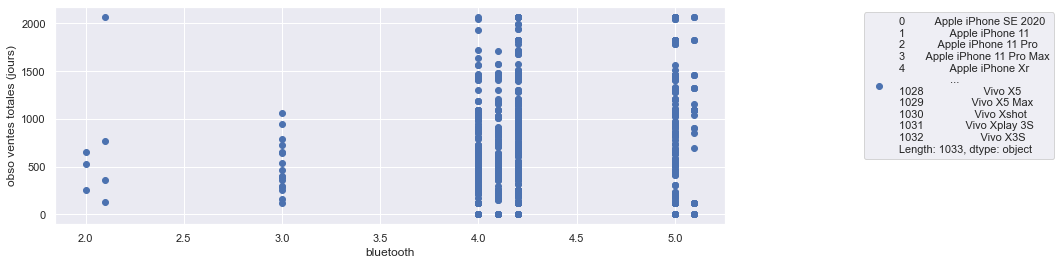

2G (FR)


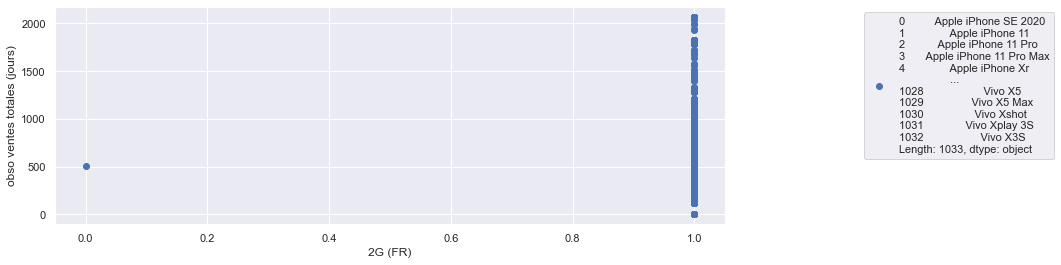

3G (FR)


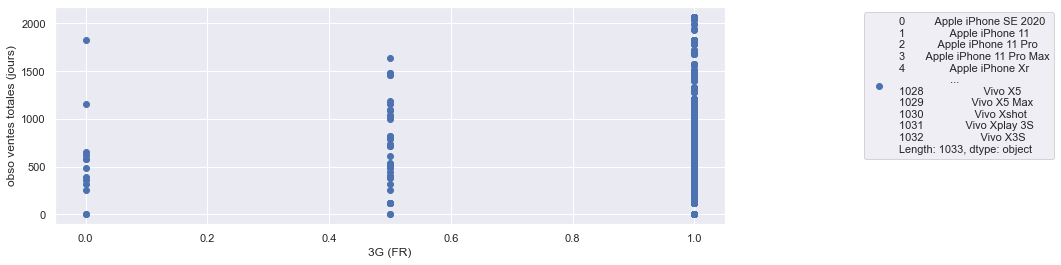

4G (FR)


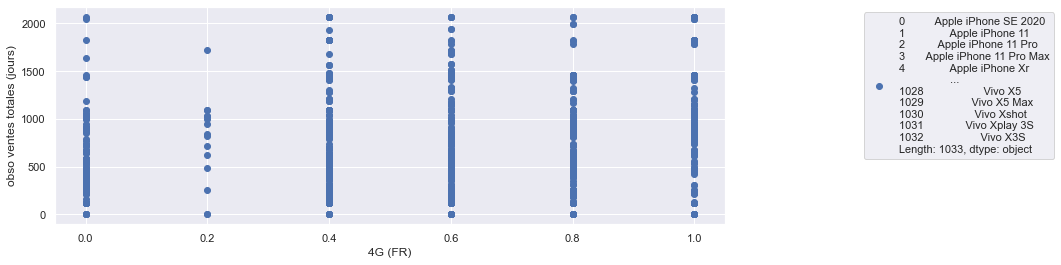

5G (FR)


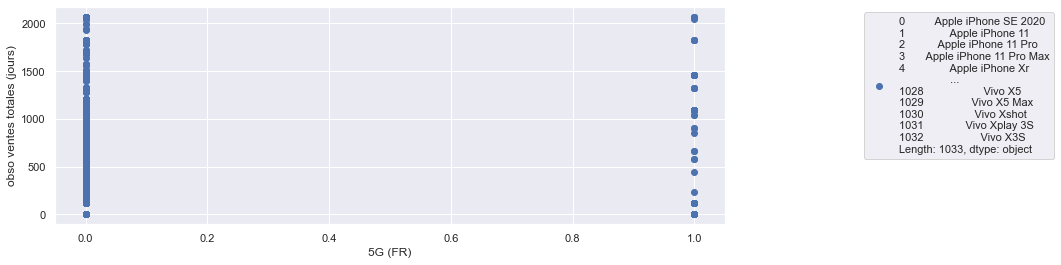

2G (US)


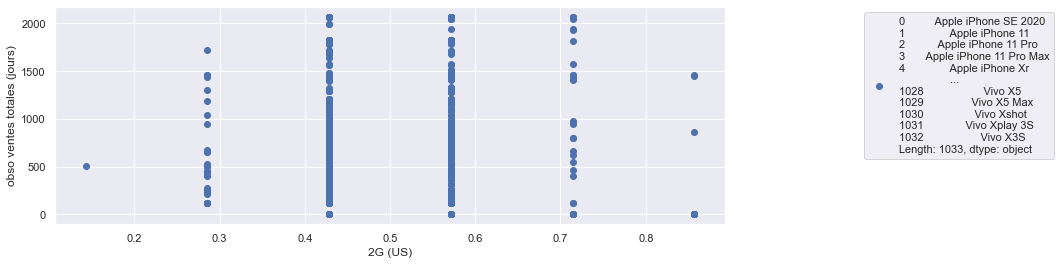

3G (US)


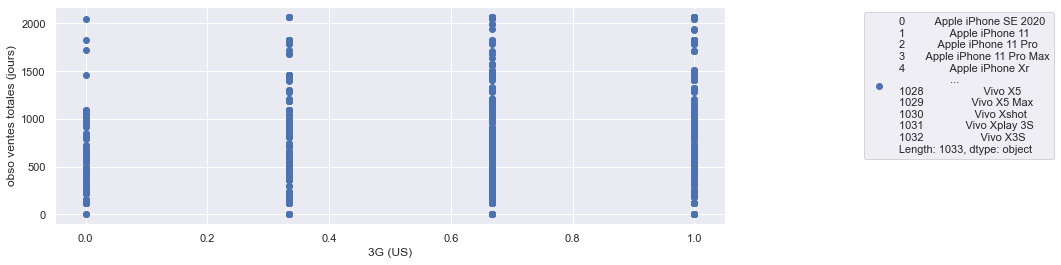

4G (US)


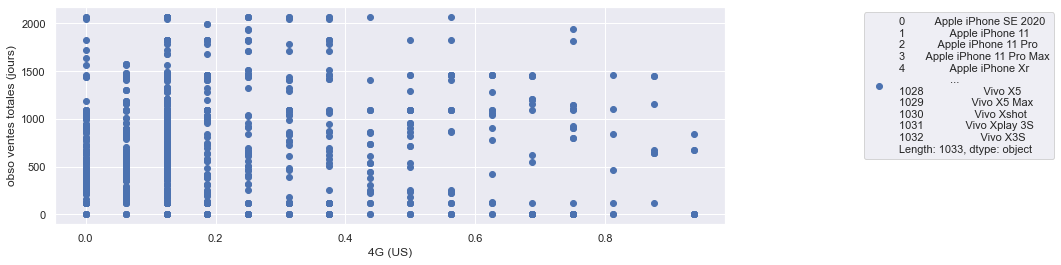

5G (US)


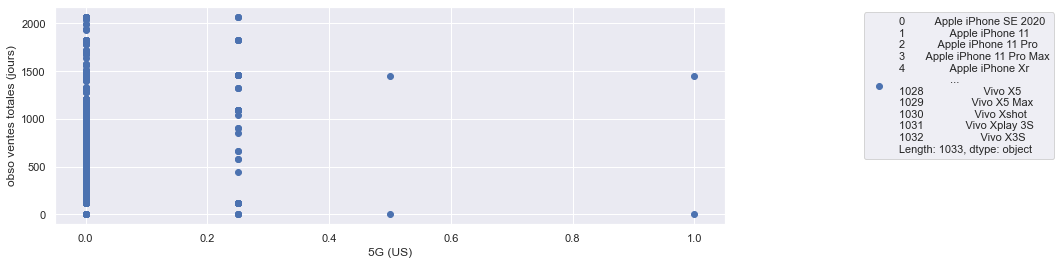

2G (JP)


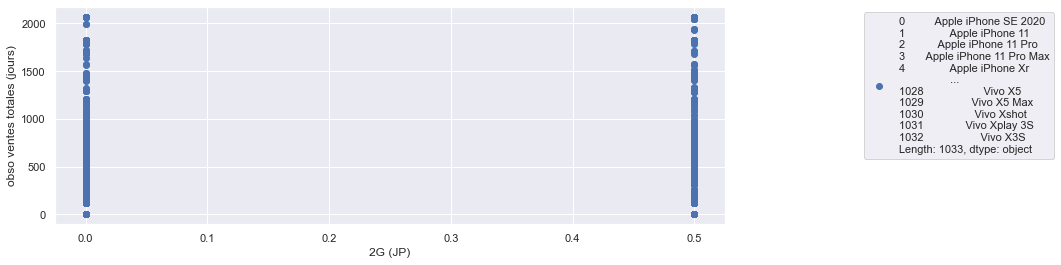

3G (JP)


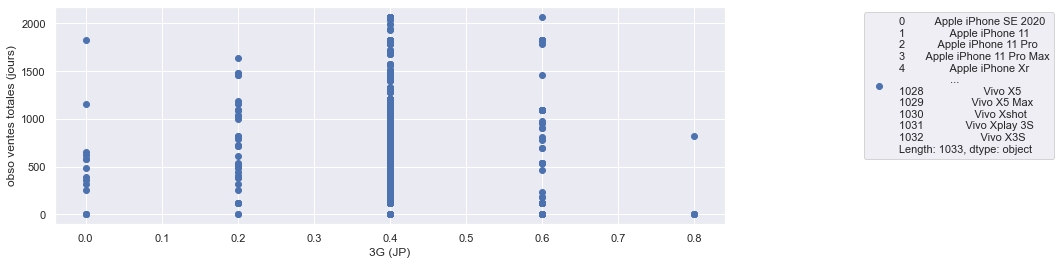

4G (JP)


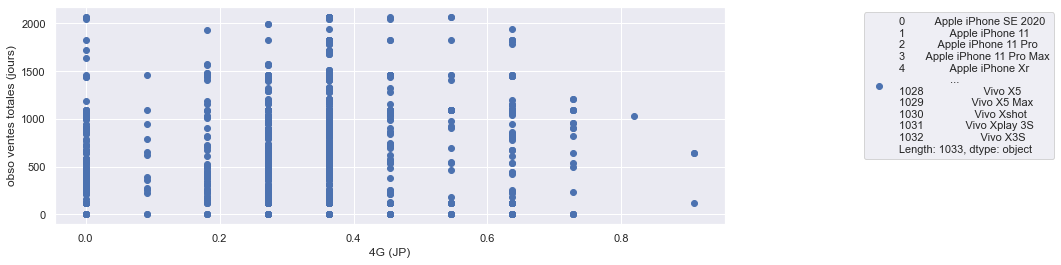

5G (JP)


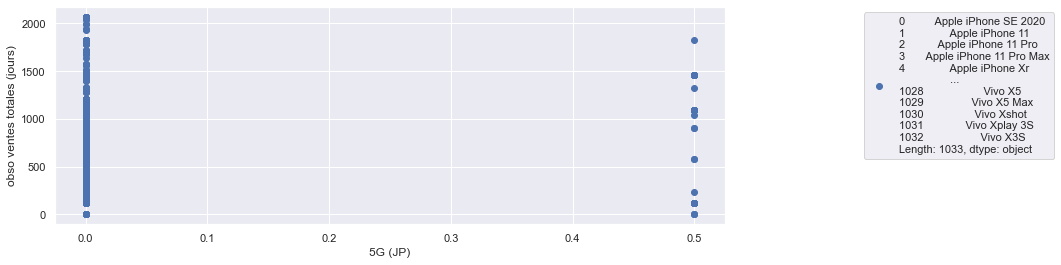

2G (CN)


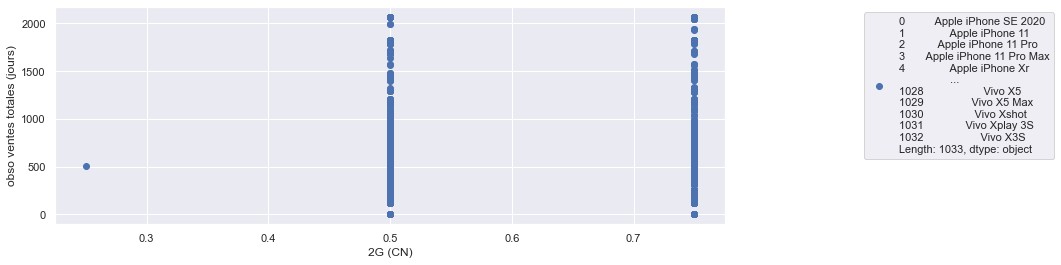

3G (CN)


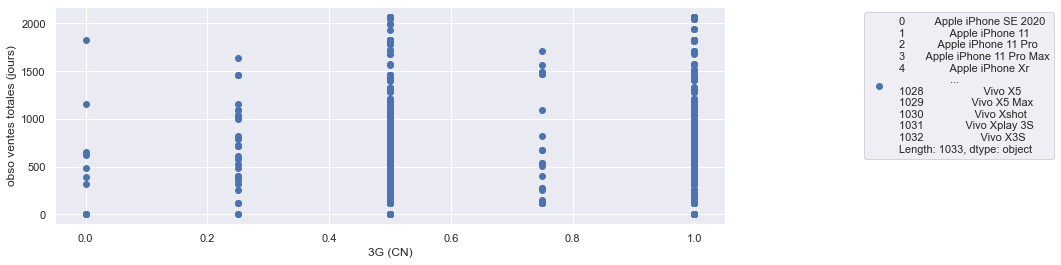

4G (CN)


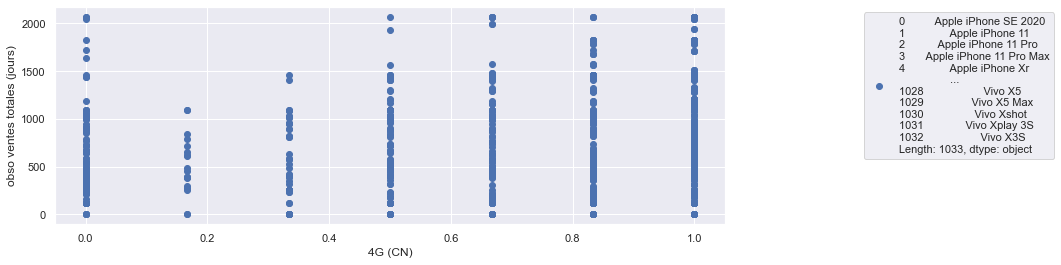

5G (CN)


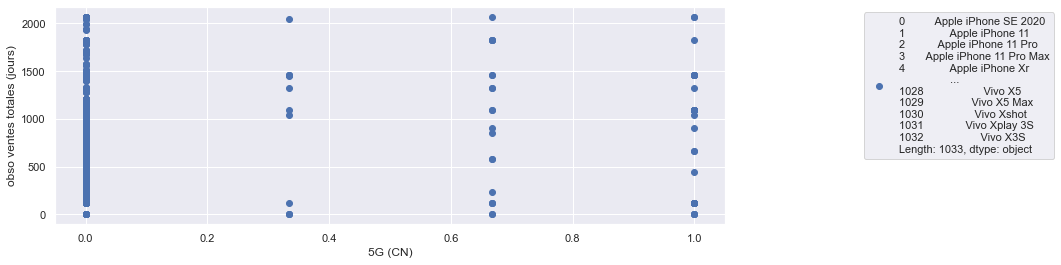

général (avis)


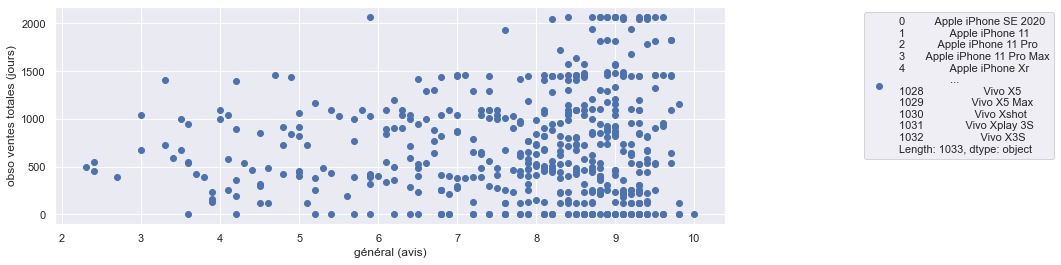

rayures? (avis)


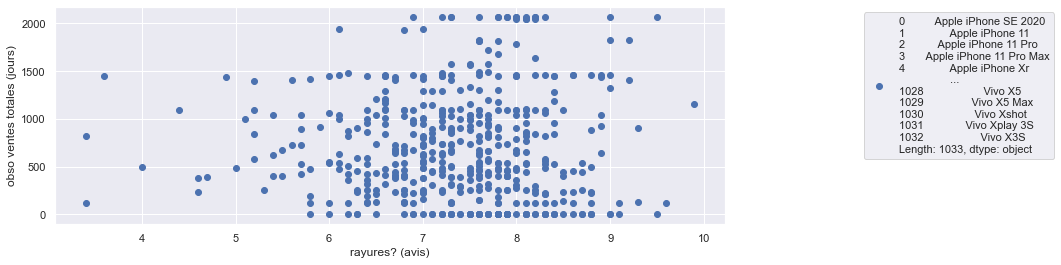

joli? (avis)


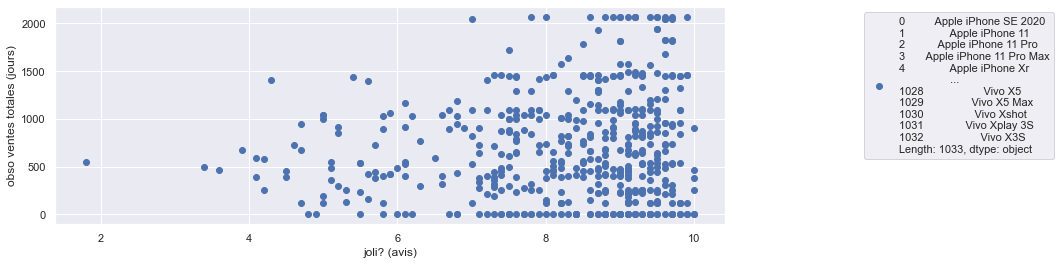

pratique? (avis) 


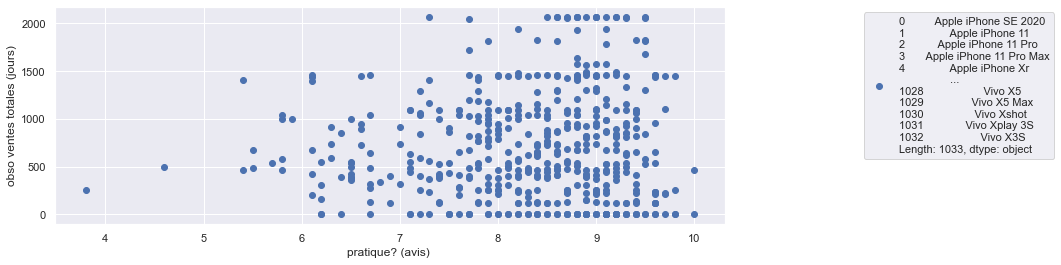

soleil? (avis)


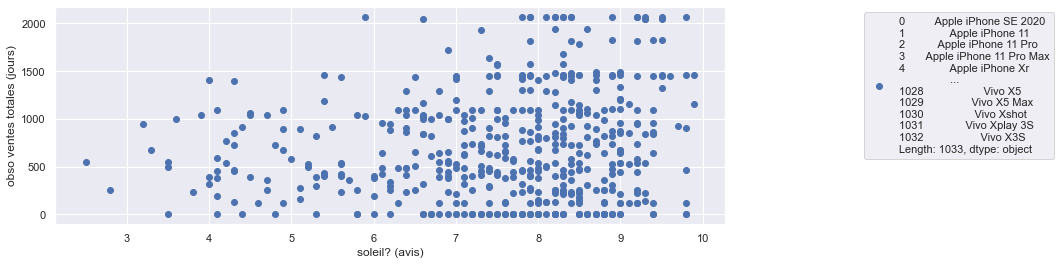

son? (avis)


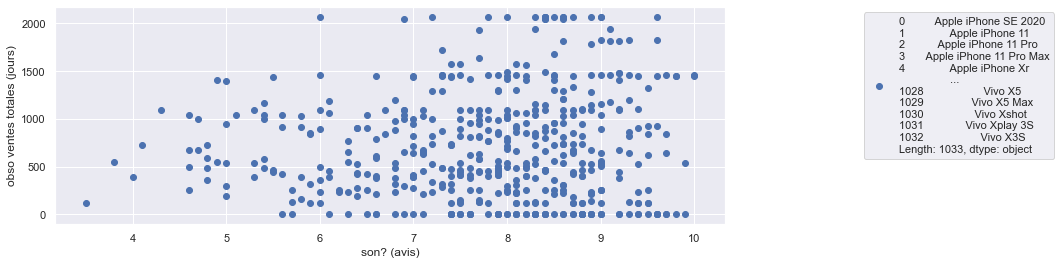

fluide? (avis)


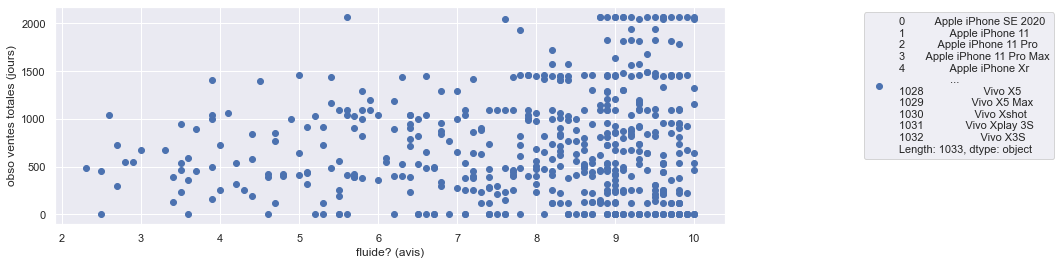

jeux? (avis)


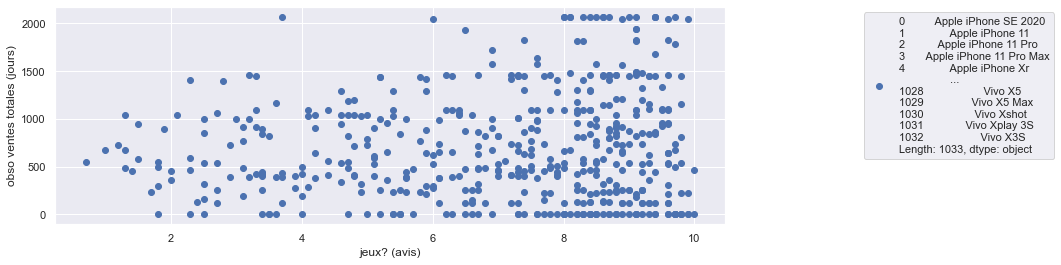

photos diurnes (avis)


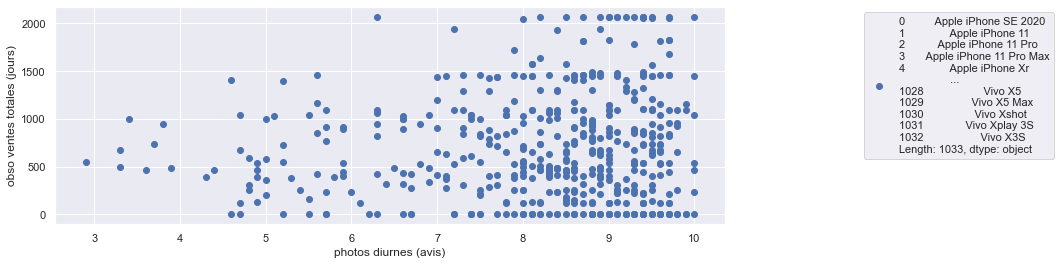

photos nocturnes (avis)


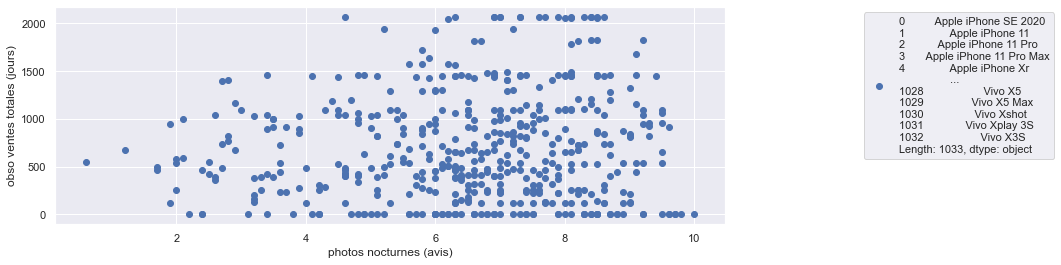

selfies? (avis)


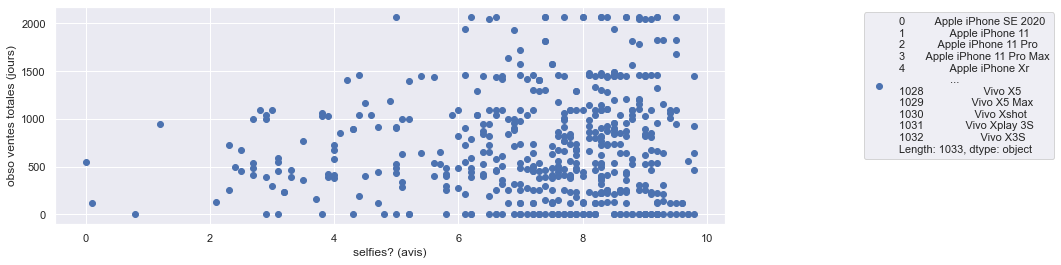

flash? (avis)


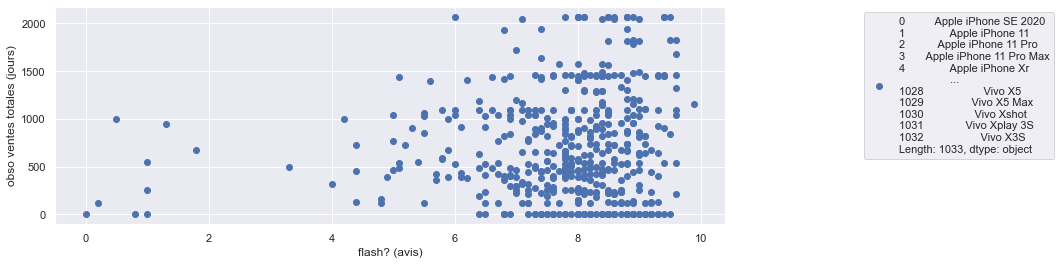

appels? (avis)


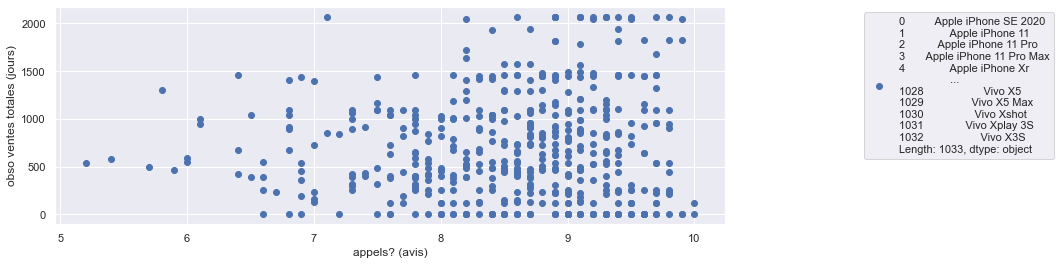

GPS? (avis)


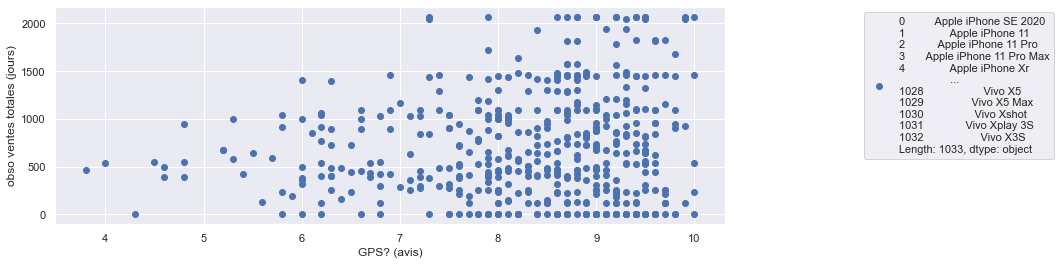

Wifi? (avis)


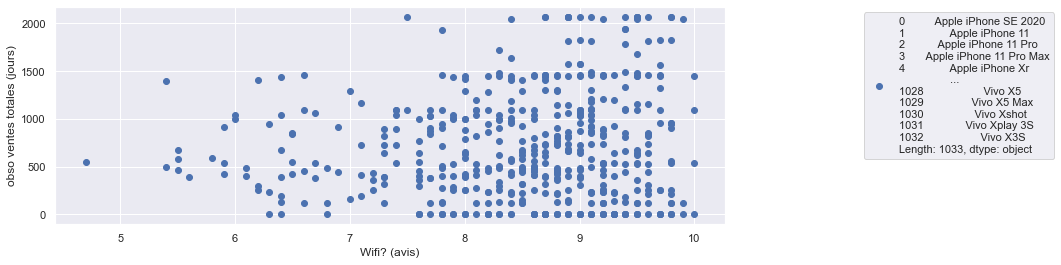

obso trends


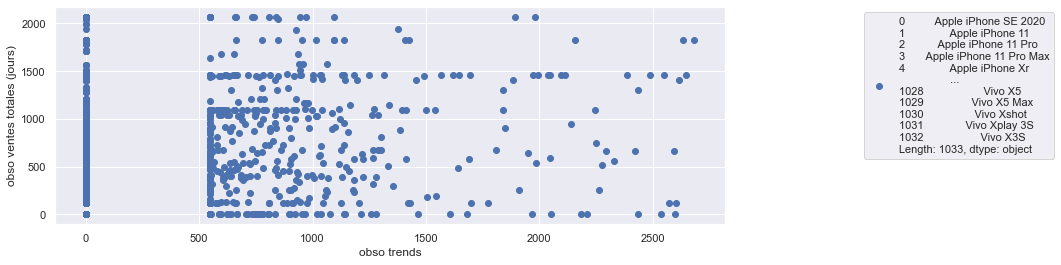

In [42]:
entrees = []
obso = ['obso ventes totales','obso trends']
for k in data_float.keys():
    if k not in ['marque', 'modèle', 'obso ventes totales','date début commercialisation']:
        entrees.append(k)
for i,k in enumerate(entrees):
    #plt.subplot(len(entrees),1,i+1)   
    print(k)
    plt.figure(figsize=(12,4))
    plt.plot(data_float[k], data_float[obso[0]],'o', label=data_float['marque']+" "+data_float['modèle'])
    plt.ylabel(obso[0]+' (jours)')
    plt.xlabel(k)
    plt.legend(bbox_to_anchor=(1.5, 1))
    plt.show()

## Données écumées

In [20]:
data_etiquetees = data_float.loc[data_float[obso[0]] == data_float[obso[0]]]
print("[taille départ]", data_float.shape[0])
print("étiquetage","-"+str(data_float.shape[0]-data_etiquetees.shape[0]))
data_netoyees = data_etiquetees.copy()
shape = data_etiquetees.shape[0]
for k in data_etiquetees.keys():  
    if k != obso[1]:
        data_netoyees = data_netoyees.loc[data_netoyees[k] == data_netoyees[k]]
        if k == obso[0]:
            data_netoyees = data_netoyees.loc[data_netoyees[k] > 0] 
        print(k,"-"+str(shape-data_netoyees.shape[0]))  
        shape = data_netoyees.shape[0]
print("[taille arrivée]", data_netoyees.shape[0])

[taille départ] 1033
étiquetage -0
marque -0
modèle -0
date début commercialisation -24
prix au lancement (€) -1
largeur (mm) -0
hauteur (mm) -0
epaisseur (mm) -0
masse (g) -0
surface utile (%) -0
densité (ppi) -0
largeur (px) -0
hauteur (px) -0
résistant aux rayures -0
gorilla glass -0
nombre de processeur -0
antutu -1
fréquence (GHz) -0
RAM (GB) -0
capacité (GB) -0
extensible -0
capacité (mAh) -0
Résolution capteur principal (Mpx) -0
Résolution capteur selfie (Mpx) -7
fingerprint -0
proximité -0
accéléromètre -0
lumière d'ambiance -0
Boussole -0
gyroscope -0
baromètre -0
NFC -0
jack -0
radio FM -0
computer sync -0
tethering -0
VoLTE -0
OTA -0
bluetooth -13
2G (FR) -0
3G (FR) -0
4G (FR) -0
5G (FR) -0
2G (US) -0
3G (US) -0
4G (US) -0
5G (US) -0
2G (JP) -0
3G (JP) -0
4G (JP) -0
5G (JP) -0
2G (CN) -0
3G (CN) -0
4G (CN) -0
5G (CN) -0
général (avis) -490
rayures? (avis) -1
joli? (avis) -0
pratique? (avis)  -0
soleil? (avis) -0
son? (avis) -0
fluide? (avis) -0
jeux? (avis) -0
photos diurnes

In [21]:
y = np.array([int(val) for val in data_netoyees[obso[0]]])

#separation aleatoire entre donnees d'entrainement et donnees de test 
#from sklearn import model_selection
#X_train, X_test, y_train, y_test = model_selection.train_test_split(data_netoyees.drop(['marque', 'modèle','date début commercialisation', 'obso ventes totales'],axis=1), y, test_size=0.3 )
#y = np.array([int(val) for val in data_netoyees['obso ventes totales']])

#separation aleatoire entre donnees d'entrainement et donnees de test
annee_avantapres = datetime.date(2016,12,31)
train = data_netoyees.loc[data_netoyees['date début commercialisation']<=annee_avantapres]
test = data_netoyees.loc[data_netoyees['date début commercialisation']>annee_avantapres]

#train['date début commercialisation'] = [datetime.date(int(d.split('-')[0]),int(d.split('-')[1]),int(d.split('-')[2])) for d in train['date début commercialisation']]
#test['date début commercialisation'] = [datetime.date(int(d.split('-')[0]),int(d.split('-')[1]),int(d.split('-')[2])) for d in train['date début commercialisation']]

print("pourcentage de données d'entraînement sur données totales",round((train.shape[0]/data_netoyees.shape[0])*100,1),"%") 
X_train = train.drop([obso[0],obso[1],'modèle', 'marque','date début commercialisation'], axis=1)
X_test = test.drop([obso[0],obso[1],'modèle', 'marque','date début commercialisation'], axis=1)
y_train = np.array([int(val) for val in train[obso[0]]])
y_test = np.array([int(val) for val in test[obso[0]]])

pourcentage de données d'entraînement sur données totales 49.9 %


## Normalisation des données d'entrées

In [23]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [24]:
def distrib(x,debut,scale,var):
    """modèle de distribution"""
    return alpha.pdf(x, 0.8, debut-scale/10, scale)#*var*scale   
    #return stat.norm.pdf(x,debut,scale)#*var*scale
    #return alpha.pdf(x, 0.8, debut, scale)*scale*var 
    #return weibull_min.pdf(x, 1.1, debut, scale)*scale*var 

In [25]:
def show_distrib(data, y_,option):
    """afficher proprement le vecteur y en fonction du temps avec le modèle de distribution distrib"""
    t = np.arange(datetime.date(2010,1,1).toordinal(),datetime.date(2021,1,1).toordinal(),1)
    fig, ax = plt.subplots(figsize=(12,3))
    for index,(i,ligne) in enumerate(data.iterrows()):
        y = distrib(t,ligne["date début commercialisation"].toordinal(),y_[index],1)
        plt.plot(t,y,option)
    ax.set_xlim([datetime.date(2010,1,1),datetime.date(2021,1,1)])
    plt.show()

## Boîtes noires

### méthodes débiles

In [26]:
def randomDumb(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(y_test)==0:
        return "Random (naïf)"#string name
    else:    
        y_pred_random = np.random.randint(np.min(y_train), np.max(y_train), y_test.shape)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)),y_pred_random

In [27]:
def moyDumb(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "Moyenne (naïf)"#string name
    else:  
        dum = dummy.DummyRegressor(strategy='mean')
        dum.fit(X_train, y_train)
        y_pred_dum = dum.predict(X_test)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)),y_pred_dum

In [28]:
def medDumb(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "Médiane (naïf)"#string name
    else:  
        dum = dummy.DummyRegressor(strategy='median')
        dum.fit(X_train, y_train)
        y_pred_dum = dum.predict(X_test)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)),y_pred_dum

### Autres méthodes

In [29]:
def foret(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "forêt aléatoire"#string name
    else:
        from sklearn.ensemble import RandomForestRegressor
        foret = RandomForestRegressor()
        modele = foret.fit(X_train_std, y_train)
        y_pred_foret = modele.predict(X_test_std)
        score_foret = np.sqrt(metrics.mean_squared_error(y_test, y_pred_foret))
        return score_foret, y_pred_foret

In [30]:
def sgdRegressor(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "SGD"#string name
    else:
        from sklearn.linear_model import SGDRegressor 
        sgd = SGDRegressor()
        modele = sgd.fit(X_train, y_train)
        y_pred_sgd = modele.predict(X_test)
        score_sgd = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sgd))
        return score_sgd, y_pred_sgd

In [31]:
def gradientRegressor(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "Gradient Boosting"#string name
    else:    
        from sklearn.ensemble import GradientBoostingRegressor
        grad = GradientBoostingRegressor(random_state=1, n_estimators=10)
        modele = grad.fit(X_train, y_train)
        y_pred_grad = modele.predict(X_test)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred_grad)),y_pred_grad

In [32]:
def mlpRegressor(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "MLP"#string name
    else:    
        from sklearn.neural_network import MLPRegressor
        mlp = MLPRegressor(max_iter=10000, solver='lbfgs')
        modele = mlp.fit(X_train, y_train)
        y_pred_mlp = modele.predict(X_test)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp)),y_pred_mlp

In [33]:
def knnRegressor(X_train=[], X_test=[], y_train=[], y_test=[]):
    if len(X_train)==0:
        return "KNN-10"#string name
    else:    
        from sklearn import neighbors
        knn = neighbors.KNeighborsRegressor(n_neighbors=10)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred)), y_pred

## Benchmarking

In [36]:
def pretty_print(key, value, fg, bgcolor, bgvalue): #37: white, 33: yellow, 34: blue
    print("\033[1;"+fg+";"+bgcolor+"m "+key+" "*(19-len(key)),bg(bgvalue),str(round(value,1))," "*(8-len(str(round(value,1)))), bg.rs)

     Root Mean Squared Error    

 Méthodes naïves 
 Random (naïf)        753.8     
 Moyenne (naïf)       607.4     
 Médiane (naïf)       681.1     

 Autres méthodes 
 forêt aléatoire      614.0     
 SGD                  706.6     
 Gradient Boosting    641.7     
 MLP                  1328.0    
 KNN-10               623.0     

 Statistiques Modes 
 minimum              120       
 1er quartile         505.2     
 moyenne              948.8     
 médiane              925.0     
 3ème quartile        1409.8    
 maximum              2069      

                                

données tests


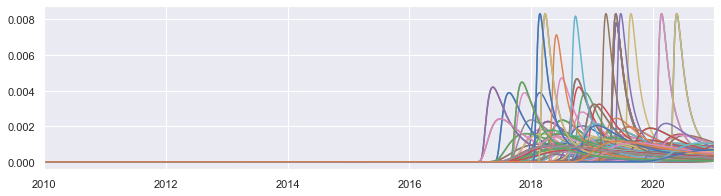

Moyenne (naïf)


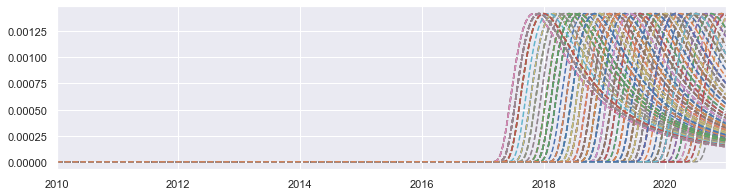

KNN-10


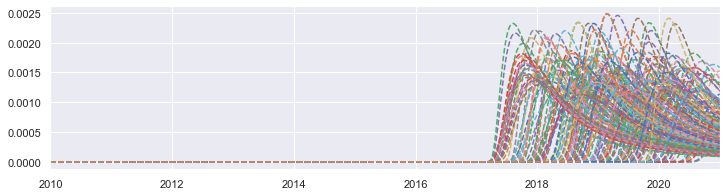

In [41]:
def benchmark(liste_fonction, liste_affichage, X_train, X_test, y_train, y_test, test): 
    lut = [202, 203, 204, 205, 206, 207, 171, 135, 99, 63, 27, 33, 39, 45, 51, 49]#50, 48, 47, 46]
    colorbar = "\n"
    for l in lut:
        colorbar += bg(l)+"  "+bg.rs
    lut.reverse()
    defaut_debiles = [randomDumb, moyDumb, medDumb]
    defaut_intelligentes = [foret,sgdRegressor,gradientRegressor,mlpRegressor]
    valeur_bg = {} 
    valeur_brute = {}
    y_resultat = {}
    for f in defaut_debiles+defaut_intelligentes+liste_fonction:
        valeur_brute[f()], y_resultat[f()] = f(X_train, X_test, y_train, y_test)
  
    minimum = np.min([x for x in valeur_brute.values()])
    maximum = np.max([x for x in valeur_brute.values()])
    for f in defaut_debiles+defaut_intelligentes+liste_fonction: 
         valeur_bg[f()] = lut[int((valeur_brute[f()]-minimum)/(maximum-minimum)*(len(lut)-1))]
    print("\033[5;37;40m     Root Mean Squared Error    ")      #erreur quadratique moyenne pris à la racine carrée pour avoir des jours  
    print()
    
    print("\033[5;30;44m Méthodes naïves ")    
    for f in defaut_debiles:
        pretty_print(f(), valeur_brute[f()], "30", "44", valeur_bg[f()])
    
    print()
    
    print("\033[5;30;44m Autres méthodes ")    
    for f in defaut_intelligentes:
        pretty_print(f(), valeur_brute[f()], "30", "44", valeur_bg[f()])
   
    for f in liste_fonction:        
        pretty_print(f(), valeur_brute[f()], "30", "46", valeur_bg[f()])
    print()
    
    print("\033[5;37;40m Statistiques Modes ")
    pretty_print("minimum", np.min(y_test), "37", "40", 235)
    pretty_print("1er quartile", np.quantile(y_test, 0.25), "37", "40", 235)
    pretty_print("moyenne", np.mean(y_test),"37", "40", 235)
    pretty_print("médiane", np.median(y_test), "37", "40", 235)
    pretty_print("3ème quartile", np.quantile(y_test, 0.75), "37", "40", 235)
    pretty_print("maximum", np.max(y_test), "37", "40", 235)  
    
    print(colorbar)
    #show_distrib(train,y_train,'-')
    print()
    print("données tests")
    show_distrib(test,y_test,'-')
    for f in liste_affichage+liste_fonction:   
        print(f())
        show_distrib(test,y_resultat[f()],'--')
        
benchmark([knnRegressor],[moyDumb],X_train_std,X_test_std,y_train,y_test,test)

## Annexes

pistes de recherches (pas très utiles pour but final)

In [112]:
neigh = range(2,30)
scores_knn = []
for n in neigh:
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    scores_knn.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [293]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(max_iter=1000)
modele = lor.fit(X_train_std, y_train)
y_pred_logi = modele.predict(X_test_std)
scores_logi = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_logi))] * len(neigh)

In [294]:
from sklearn.linear_model import LinearRegression
lir = LogisticRegression(max_iter=1000)
modele = lir.fit(X_train_std, y_train)
y_pred_line = modele.predict(X_test_std)
scores_line = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_line))] * len(neigh)

In [295]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=10000, solver='lbfgs')
modele = mlp.fit(X_train_std, y_train)
y_pred_mlp = modele.predict(X_test_std)
scores_mlp = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlp))] * len(neigh)

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(random_state=1, n_estimators=10)
modele = grad.fit(X_train_std, y_train)
y_pred_grad = modele.predict(X_test_std)
scores_grad = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_grad))] * len(neigh)

In [297]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = neighbors.KNeighborsRegressor(n_neighbors=10)
reg4 = neighbors.KNeighborsRegressor(n_neighbors=12)
vot = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
modele = vot.fit(X_train_std, y_train)
y_pred_vot = modele.predict(X_test_std)
scores_vot = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_vot))] * len(neigh)

In [298]:
from sklearn.linear_model import SGDRegressor 
sgd = SGDRegressor()
modele = sgd.fit(X_train_std, y_train)
y_pred_sgd = modele.predict(X_test_std)
scores_sgd = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_sgd))] * len(neigh)

In [299]:
from sklearn.ensemble import RandomForestRegressor
foret = RandomForestRegressor()
modele = foret.fit(X_train_std, y_train)
y_pred_foret = modele.predict(X_test_std)
scores_foret = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_foret))] * len(neigh)

In [300]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Évaluation
scores_dum = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))] * len(neigh)

In [302]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
scores_rand = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))] * len(neigh)

ValueError: low >= high

NameError: name 'scores_vot' is not defined

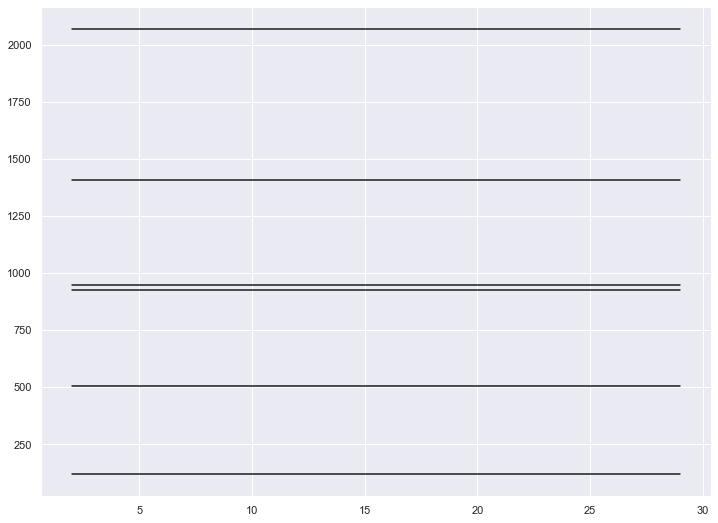

In [119]:
plt.figure(figsize=(12,9))
plt.plot(neigh, [np.min(y_test)]*len(neigh), label="Modes stats :\nminimum : "+str(round(np.min(y_test),1))+" jours", color="k")
plt.plot(neigh, [np.quantile(y_test, 0.25)]*len(neigh), label="$1^{er}$ quartile : "+str(round(np.quantile(y_test, 0.25),1))+" jours", color="k")
plt.plot(neigh, [np.mean(y_test)]*len(neigh), label="moyenne : "+str(round(np.mean(y_test),1))+" jours", color="k")
plt.plot(neigh, [np.median(y_test)]*len(neigh), label="médiane : "+str(round(np.median(y_test),1))+" jours", color="k")
plt.plot(neigh, [np.quantile(y_test, 0.75)]*len(neigh), label="$3^{ème}$ quartile : "+str(round(np.quantile(y_test, 0.75),1))+" jours", color="k")
plt.plot(neigh, [np.max(y_test)]*len(neigh), label="maximum : "+str(round(np.max(y_test),1))+" jours", color="k")
plt.plot(neigh, scores_vot,label="Algos prediction :\n[voteR] RMSE : "+str(round(np.min(scores_vot),1))+" jours")
plt.plot(neigh, scores_foret,label="[randomForest] RMSE : "+str(round(np.min(scores_foret),1))+" jours")
plt.plot(neigh, scores_grad,label="[gradRegr] RMSE : "+str(round(np.min(scores_grad),1))+" jours")
plt.plot(neigh, scores_knn,label="[KNN-"+str(neigh[np.argmin(scores_knn)])+"] RMSE : "+str(round(np.min(scores_knn),1))+" jours")
plt.plot(neigh, scores_sgd,label="[sgdRegr] RMSE : "+str(round(np.min(scores_sgd),1))+" jours")
plt.plot(neigh, scores_logi,label="[logiRegr] RMSE : "+str(round(np.min(scores_logi),1))+" jours")
plt.plot(neigh, scores_line,label="[lineRegr] RMSE : "+str(round(np.min(scores_line),1))+" jours")
plt.plot(neigh, scores_mlp,label="[MachLearn] RMSE : "+str(round(np.min(scores_mlp),1))+" jours")
plt.plot(neigh, scores_rand,label="Dumb models :\n[random] RMSE : "+str(round(np.min(scores_rand),1))+" jours")
plt.plot(neigh, scores_dum,label="[moyenne] RMSE : "+str(round(np.min(scores_dum),1))+" jours")

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [241]:
y_pred = knn.predict(X_test_std)
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))
plt.scatter(y_test, y_pred, color='coral')

ValueError: Found input variables with inconsistent numbers of samples: [314, 212]

1.138591143459572


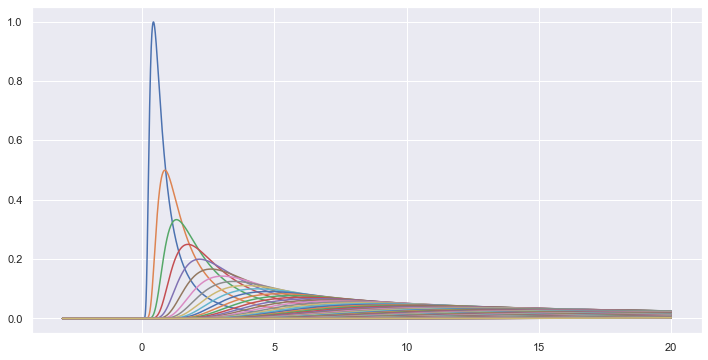

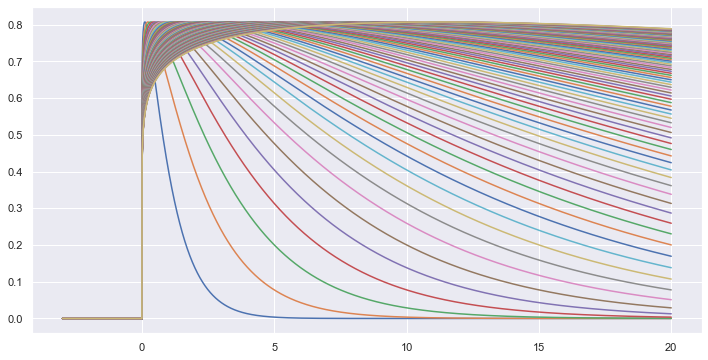

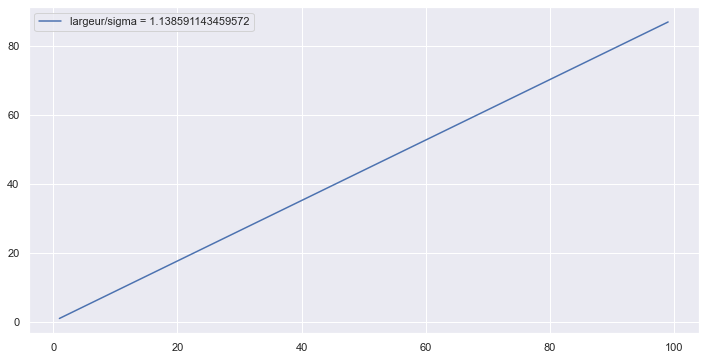

In [46]:
x = np.arange(-3, 20, 0.001)
fig1, ax1 = plt.subplots(figsize=(12,6))
fig2, ax2 = plt.subplots(figsize=(12,6))
fig3, ax3 = plt.subplots(figsize=(12,6))
#fig5, ax5 = plt.subplots(figsize=(12,6))

sigma = []
std = []
evaluate_1sigma0 = []
evaluate_2sigma0 = []
evaluate_2sigma5 = []
evaluate_largeur = []

largeur = range(1,100)
for i in largeur:
    y = distrib(x,0,i,1)
    ax1.plot(x,y,label="alpha")
    
    std.append(weibull_min.std(1.1,0,i))
    rapport = i/weibull_min.std(1.1,0,i)
    y = weibull_min.pdf(x, 1.1, 0, i)*i
    ax2.plot(x,y,label="weibull")

    sig = tstd(y)
    sigma.append(sig)
    
    evaluate_1sigma0.append(distrib(sig,0,i,1000))
    evaluate_2sigma0.append(distrib(sig*2,0,i,1000))
    evaluate_2sigma5.append(distrib(sig*2.5,0,i,1000))
    evaluate_largeur.append(distrib(i,0,i,1))
    
#ax1.plot(largeur,sigma)
print(rapport)
ax3.plot(largeur,std, label="largeur/sigma = "+str(rapport))
ax3.legend()
###ax2.plot(largeur,evaluate_1sigma0,label="evaluate_1sigma0")
##ax2.plot(largeur,evaluate_2sigma0,label="evaluate_2sigma0")
#ax2.plot(largeur,evaluate_2sigma5,label="evaluate_2sigma5")
#ax2.plot(largeur,evaluate_largeur,label="evaluate_largeur")
#ax2.legend(bbox_to_anchor=(1,1))
#sigma = []
#for i in hauteur:
#    y = distrib(x,0,1,i)
#    sigma.append(math.sqrt(tvar(y)))
#ax3.plot(largeur,sigma)

#sigma = []
#for i in hauteur:
#    y = distrib(x,i,1,1)
#    sigma.append(math.sqrt(tvar(y)))
#ax3.plot(largeur,sigma)

#sigma = []
#for i in hauteur:
#    y = distrib(x,0,i,i*5)
#    sigma.append(math.sqrt(tvar(y)))
#ax5.plot(largeur,sigma)

plt.show()

In [8]:
a=0.8
mean, vara, skew, kurt = alpha.stats(a, moments='mvsk')
print(alpha.stats(a, moments='mvsk'))

(array(inf), array(inf), array(nan), array(nan))


In [81]:
mean, var, skew, kurt = stat.norm.stats(moments='mvsk')
print(stat.norm.stats(moments='mvsk'))

(array(0.), array(1.), array(0.), array(0.))


In [132]:
round(stat.norm.cdf(2),7)

0.9772499

In [72]:
largeur = 2
#round(triang.cdf(largeur*0.53525027,0,0,largeur),7)
round(triang.cdf(largeur*0.547769,0,0,largeur),7)

0.7954871

In [75]:
#round(stat.alpha.cdf(59.588,a,0,1),7)
round(stat.alpha.cdf(2*largeur,a,0-1/10*largeur, largeur),7)

0.7954871

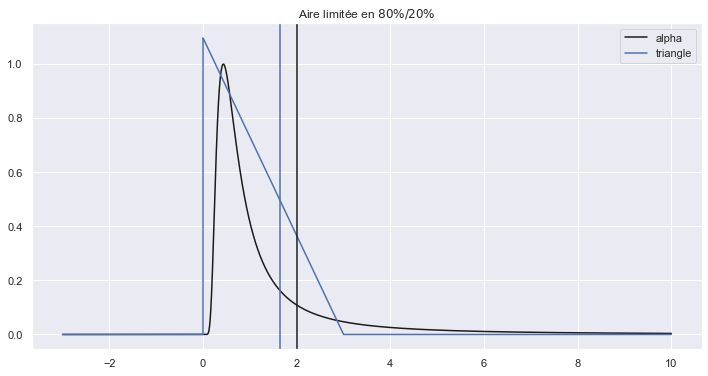

In [95]:
x = np.arange(-3, 10, 0.001)
fig1, ax = plt.subplots(figsize=(12,6))
#y = weibull_min.pdf(x, 1.1, 0, 1)
#ax.plot(x,y,label="weibull")
largeur_alpha = 1
y = distrib(x,0,1,1)*largeur_alpha
ax.plot(x,y,label="alpha",color='k')
#y = stat.norm.pdf(x,0,1)
#ax.plot(x,y,label="normale")
#y = alpha.cdf(x, 0.8, 0-1/10, 1)#*var*scale  
#ax.plot(x,y,label="alpha cdf")
largeur_triangle = 3
y = triang.pdf(x,0,0,largeur_triangle)*largeur_triangle*0.547769
ax.plot(x,y,color='b',label="triangle")
plt.axvline(x=largeur_triangle*0.547769,color='b')
plt.axvline(x=largeur_alpha*2,color='k')
plt.title("Aire limitée en $80\%/20\%$")
ax.legend()
plt.show()